In [1]:
# todo list
# eliminate gibberish
# use pickled data from preprocessing file

In [1]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, r2_score, recall_score, ConfusionMatrixDisplay

In [2]:
df1 = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')
df = pd.concat([df1, df2])
df = df[(df['Sentiment'] == 'Positive') | (df['Sentiment'] == 'Negative')]
df['Len'] = df['OriginalTweet'].apply(len)
# df = df.dropna()
# df = df[0:100]
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Len
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,250
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,180
...,...,...,...,...,...,...,...
3784,3785,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive,291
3790,3791,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive,217
3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative,215
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127


In [3]:
df.isna().sum()

UserName            0
ScreenName          0
Location         4918
TweetAt             0
OriginalTweet       0
Sentiment           0
Len                 0
dtype: int64

# Preprocessing

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
stopword_list = set(stopwords.words('english'))

In [6]:
extra_punct = [
    ',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&',
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
    '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',
    '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”',
    '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾',
    '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼',
    '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
    'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»',
    '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø',
    '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def clean_stopword(text):
    return " ".join([word.lower() for word in word_tokenize(text) if word not in stopword_list])

In [9]:
def clean_special_character(text):
    return re.sub('[^a-zA-Z\s]', "", text)

In [10]:
# lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize(sentence):
    
    return 

In [11]:
# remove punctuation 
def clean_punctuation(sentence):
    for punc in string.punctuation:
        if punc in sentence:
            sentence = sentence.replace(punc, " ")
    return sentence.strip()

In [12]:
# POS tag

In [13]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_stopword)

In [14]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_special_character)

In [15]:
df['OriginalTweet'] = df['OriginalTweet'].apply(clean_punctuation)

In [16]:
df['Len'] = df['OriginalTweet'].apply(len)

In [17]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Len
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive,196
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly...,Positive,120
3,3802,48754,NaN,16-03-2020,my food stock one empty please nt panic the...,Positive,221
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,as news regions first confirmed covid case cam...,Positive,209
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store sharing insights covid ...,Positive,136
...,...,...,...,...,...,...,...
3784,3785,48737,Paraparaumu Beach,16-03-2020,just k piti new world busy staff say s way s...,Positive,203
3790,3791,48743,"Cincinnati, Ohio",16-03-2020,even though law library closed all subscriber...,Positive,171
3792,3793,48745,Washington D.C.,16-03-2020,ricepolitics mdcounties craig call general a...,Negative,157
3793,3794,48746,Israel ??,16-03-2020,meanwhile in a supermarket israel people danc...,Positive,108


# Word cloud

In [18]:
texts = " ".join([word for word in df['OriginalTweet']])

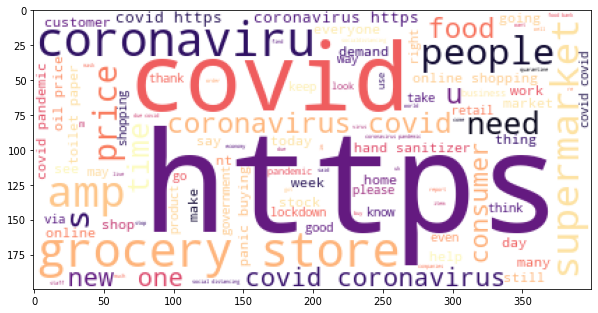

In [19]:
wc = WordCloud(max_words=100, colormap='magma', background_color='white')
wc.generate(texts)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.show()

In [20]:
test_df = pd.read_csv('Corona_NLP_test.csv').dropna()
test_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
...,...,...,...,...,...,...
3792,3793,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral


# Modeling

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
X = df['OriginalTweet']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
cv = CountVectorizer()

In [25]:
X_count_vectorizer = cv.fit_transform( X )

In [26]:
tfidfTransformer = TfidfTransformer()

X = tfidfTransformer.fit_transform(X_count_vectorizer)

In [27]:
cv.get_feature_names_out()

array(['aa', 'aaa', 'aaaaakubosan', ..., 'zur', 'zurfi', 'zweli'],
      dtype=object)

In [28]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['Sentiment'])
# y

In [29]:
encoder.classes_

array(['Negative', 'Positive'], dtype=object)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier()

In [33]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_predict = rf.predict(X_test)

In [35]:
print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'r2 score : {r2_score(y_test, y_predict)}')

Accuracy : 0.7235319331333048
r2 score : -0.10737701253593768


In [36]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1441,  806],
       [ 484, 1935]], dtype=int64)

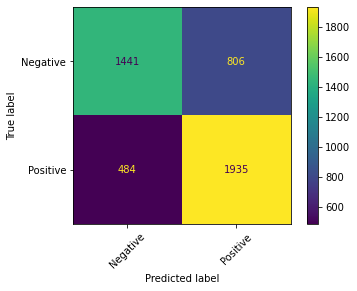

In [37]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.inverse_transform(rf.classes_))
cm_display.plot(xticks_rotation=45)
plt.show()

# SVM

In [38]:
from sklearn.svm import SVC

In [39]:
clf = SVC()

In [40]:
clf.fit(X_train, y_train)

SVC()

In [41]:
y_predict = clf.predict(X_test)

In [42]:
print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'r2 score : {r2_score(y_test, y_predict)}')

Accuracy : 0.7796828118302614
r2 score : 0.11753211714190392


In [43]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1634,  613],
       [ 415, 2004]], dtype=int64)

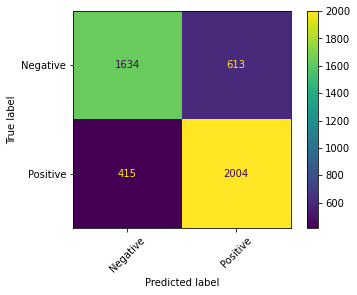

In [44]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.inverse_transform(clf.classes_))
cm_display.plot(xticks_rotation=45)
plt.show()

# Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
clf = MultinomialNB()

In [47]:
clf.fit(X_train, y_train)

MultinomialNB()

In [48]:
y_predict = clf.predict(X_test)

In [49]:
print(f'Accuracy : {accuracy_score(y_test, y_predict)}')
print(f'r2 score : {r2_score(y_test, y_predict)}')

Accuracy : 0.6896699528504072
r2 score : -0.24300923577677347


In [50]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1057, 1190],
       [ 258, 2161]], dtype=int64)

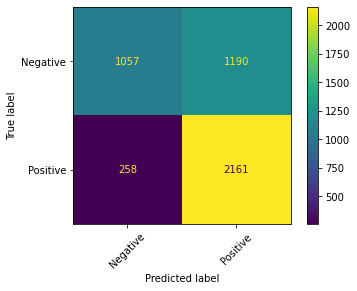

In [51]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.inverse_transform(clf.classes_))
cm_display.plot(xticks_rotation=45)
plt.show()

In [52]:
message = 'Covid made world economic gradually worse'
vectorized_message = cv.transform([message])
tfidfTransformer.fit_transform(vectorized_message)
clf.predict(tfidfTransformer.fit_transform(vectorized_message))
encoder.inverse_transform(clf.predict(tfidfTransformer.fit_transform(vectorized_message)))

array(['Negative'], dtype=object)